# Oasis Infobyte Unemployeement analysis with Python

## Author : Pathan Mobina Sulthana

## Unemployeement analysis during COVID-19

## importing required libraries

In [82]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## importing and reading the dataset into dataframe df

In [83]:
df=pd.read_csv("Unemployment_Rate_upto_11_2020.csv")

In [84]:
df

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Region.1,longitude,latitude
0,Andhra Pradesh,31-01-2020,M,5.48,16635535,41.02,South,15.9129,79.740
1,Andhra Pradesh,29-02-2020,M,5.83,16545652,40.90,South,15.9129,79.740
2,Andhra Pradesh,31-03-2020,M,5.79,15881197,39.18,South,15.9129,79.740
3,Andhra Pradesh,30-04-2020,M,20.51,11336911,33.10,South,15.9129,79.740
4,Andhra Pradesh,31-05-2020,M,17.43,12988845,36.46,South,15.9129,79.740
...,...,...,...,...,...,...,...,...,...
262,West Bengal,30-06-2020,M,7.29,30726310,40.39,East,22.9868,87.855
263,West Bengal,31-07-2020,M,6.83,35372506,46.17,East,22.9868,87.855
264,West Bengal,31-08-2020,M,14.87,33298644,47.48,East,22.9868,87.855
265,West Bengal,30-09-2020,M,9.35,35707239,47.73,East,22.9868,87.855


## checking for incorrect datatypes

In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 267 entries, 0 to 266
Data columns (total 9 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Region                                    267 non-null    object 
 1    Date                                     267 non-null    object 
 2    Frequency                                267 non-null    object 
 3    Estimated Unemployment Rate (%)          267 non-null    float64
 4    Estimated Employed                       267 non-null    int64  
 5    Estimated Labour Participation Rate (%)  267 non-null    float64
 6   Region.1                                  267 non-null    object 
 7   longitude                                 267 non-null    float64
 8   latitude                                  267 non-null    float64
dtypes: float64(4), int64(1), object(4)
memory usage: 18.9+ KB


## Descriptive Statistics

In [86]:
df.describe(include="all")

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Region.1,longitude,latitude
count,267,267,267,267.000000,2.670000e+02,267.000000,267,267.000000,267.000000
unique,27,10,1,NaN,NaN,NaN,5,NaN,NaN
top,Puducherry,31-05-2020,M,NaN,NaN,NaN,North,NaN,NaN
freq,10,27,267,NaN,NaN,NaN,79,NaN,NaN
mean,NaN,NaN,NaN,12.236929,1.396211e+07,41.681573,NaN,22.826048,80.532425
std,NaN,NaN,NaN,10.803283,1.336632e+07,7.845419,NaN,6.270731,5.831738
min,NaN,NaN,NaN,0.500000,1.175420e+05,16.770000,NaN,10.850500,71.192400
25%,NaN,NaN,NaN,4.845000,2.838930e+06,37.265000,NaN,18.112400,76.085600
50%,NaN,NaN,NaN,9.650000,9.732417e+06,40.390000,NaN,23.610200,79.019300
75%,NaN,NaN,NaN,16.755000,2.187869e+07,44.055000,NaN,27.278400,85.279900


In [87]:
df.columns

Index(['Region', ' Date', ' Frequency', ' Estimated Unemployment Rate (%)',
       ' Estimated Employed', ' Estimated Labour Participation Rate (%)',
       'Region.1', 'longitude', 'latitude'],
      dtype='object')

## we need to change Date column data type from "object to datetime".

In [88]:
df[' Date']=pd.to_datetime(df[' Date'])

In [89]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 267 entries, 0 to 266
Data columns (total 9 columns):
 #   Column                                    Non-Null Count  Dtype         
---  ------                                    --------------  -----         
 0   Region                                    267 non-null    object        
 1    Date                                     267 non-null    datetime64[ns]
 2    Frequency                                267 non-null    object        
 3    Estimated Unemployment Rate (%)          267 non-null    float64       
 4    Estimated Employed                       267 non-null    int64         
 5    Estimated Labour Participation Rate (%)  267 non-null    float64       
 6   Region.1                                  267 non-null    object        
 7   longitude                                 267 non-null    float64       
 8   latitude                                  267 non-null    float64       
dtypes: datetime64[ns](1), float64(4),

## checking for null values

In [90]:
df.isnull().sum()

Region                                      0
 Date                                       0
 Frequency                                  0
 Estimated Unemployment Rate (%)            0
 Estimated Employed                         0
 Estimated Labour Participation Rate (%)    0
Region.1                                    0
longitude                                   0
latitude                                    0
dtype: int64

## there is no null values

## importing seaborn and analysing data

In [91]:
import seaborn as sns

## all possible plots for a  given data

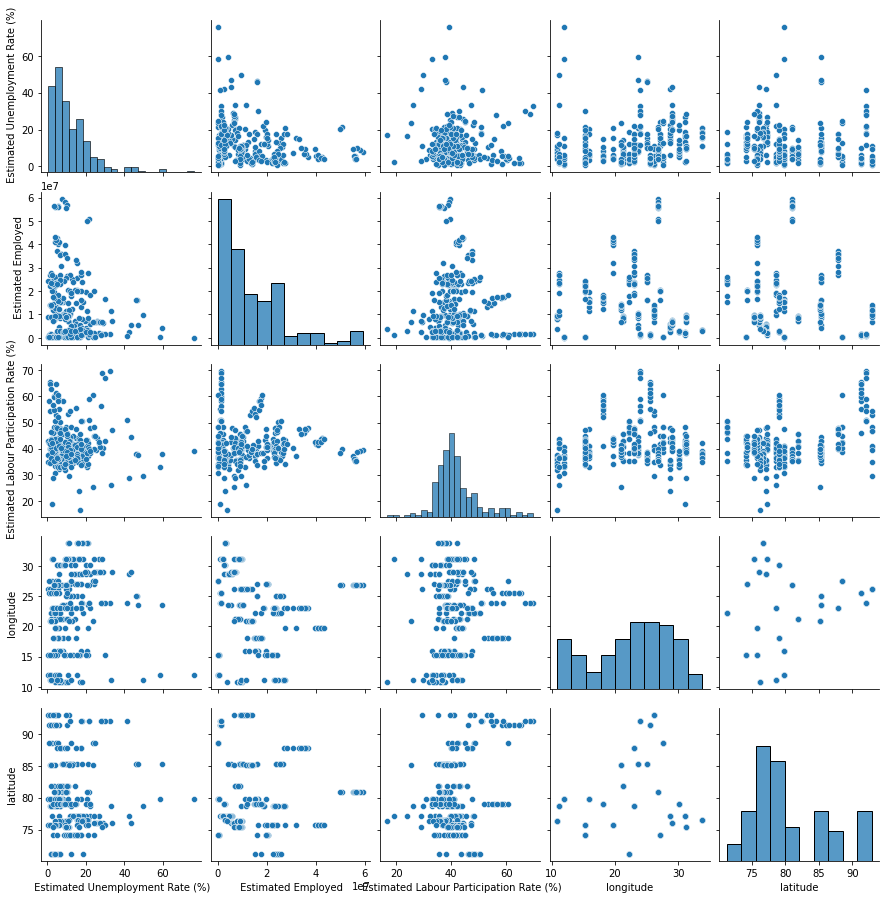

In [92]:
sns.pairplot(df)

## checking for relation of unemployeement rate with each variable in dataset

/usr/local/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Region', ylabel=' Estimated Unemployment Rate (%)'>

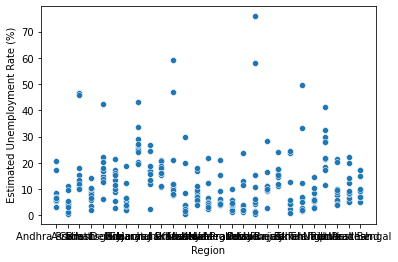

In [93]:
sns.scatterplot(df["Region"] ,df[" Estimated Unemployment Rate (%)"] )                       

In [94]:
df["Region"].unique()

array(['Andhra Pradesh', 'Assam', 'Bihar', 'Chhattisgarh', 'Delhi', 'Goa',
       'Gujarat', 'Haryana', 'Himachal Pradesh', 'Jammu & Kashmir',
       'Jharkhand', 'Karnataka', 'Kerala', 'Madhya Pradesh',
       'Maharashtra', 'Meghalaya', 'Odisha', 'Puducherry', 'Punjab',
       'Rajasthan', 'Sikkim', 'Tamil Nadu', 'Telangana', 'Tripura',
       'Uttar Pradesh', 'Uttarakhand', 'West Bengal'], dtype=object)

## Correlatrion matrix for numerical columns in data

<AxesSubplot:>

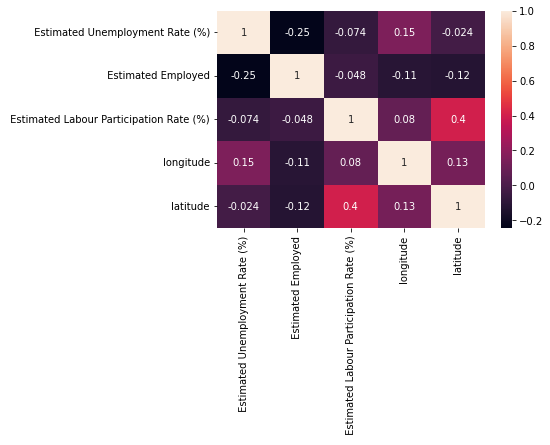

In [95]:
sns.heatmap(df.corr(),annot=True)

/usr/local/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel=' Estimated Unemployment Rate (%)', ylabel=' Frequency'>

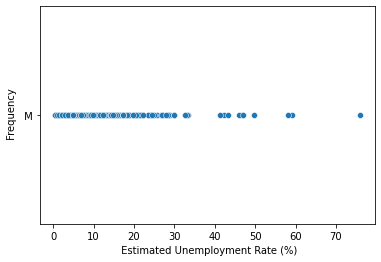

In [96]:
sns.scatterplot(df[" Estimated Unemployment Rate (%)"],df[" Frequency"])

/usr/local/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Region.1', ylabel=' Estimated Unemployment Rate (%)'>

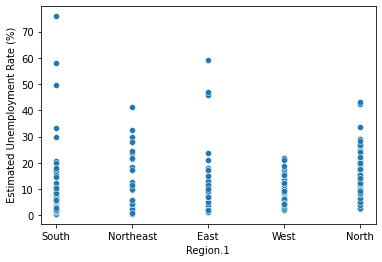

In [97]:
sns.scatterplot(df["Region.1"],df[" Estimated Unemployment Rate (%)"])

## here we can see in North region with  low and south region with high unemployeement rate

## By count plot also we can see high unemployeement rate in south region even the  count of  records from south region is less

/usr/local/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Region.1', ylabel='count'>

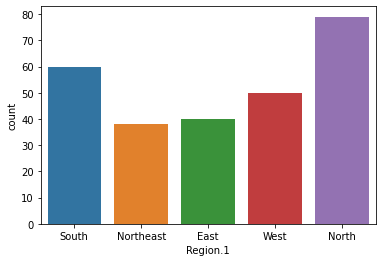

In [98]:
sns.countplot(df["Region.1"])

## creating month column for ananysing monthly unemployeement rate 

In [99]:
df["month"]=[i.month for i in df[" Date"]]

In [100]:
df["month"]

0       1
1       2
2       3
3       4
4       5
       ..
262     6
263     7
264     8
265     9
266    10
Name: month, Length: 267, dtype: int64

In [101]:
df.sort_values(by="month",inplace=True)

/usr/local/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel=' Date', ylabel=' Estimated Unemployment Rate (%)'>

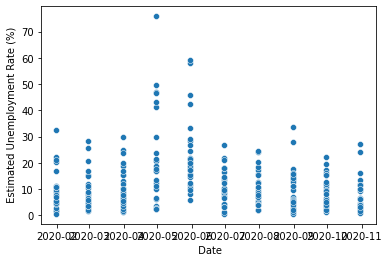

In [102]:
sns.scatterplot(df[" Date"],df[" Estimated Unemployment Rate (%)"])

## The day with high unemployeement rate is 2020-04-30 that is 75.85.

In [103]:
df[[" Date"," Estimated Unemployment Rate (%)"]].sort_values(by=" Estimated Unemployment Rate (%)",ascending=False)

,Date,Estimated Unemployment Rate (%)
172,2020-04-30,75.85
103,2020-05-31,59.23
173,2020-05-31,58.19
210,2020-04-30,49.83
102,2020-04-30,47.09
...,...,...
154,2020-06-30,1.15
206,2020-10-31,0.88
15,2020-06-30,0.60
169,2020-01-31,0.58


## Replacing month numbers by month names.

In [104]:
df["month"].replace({1:"jan",2:"feb",3:"mar",4:"april",5:"may",6:"jun",7:"jul",8:"aug",9:"sep",10:"oct",11:"nov",12:"dec"},inplace=True)

## month wise unemployment rate

/usr/local/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='month', ylabel=' Estimated Unemployment Rate (%)'>

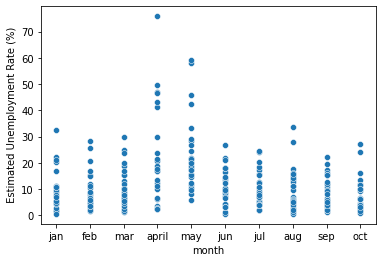

In [105]:
sns.scatterplot(df["month"],df[" Estimated Unemployment Rate (%)"])

In [106]:
df.groupby("month")[" Estimated Unemployment Rate (%)"].sum()

month
april    578.14
aug      278.46
feb      240.92
jan      239.11
jul      265.53
jun      294.60
mar      291.13
may      627.60
oct      216.71
sep      235.06
Name:  Estimated Unemployment Rate (%), dtype: float64

## April is the month with highest unemoployment 

/usr/local/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='month', ylabel='count'>

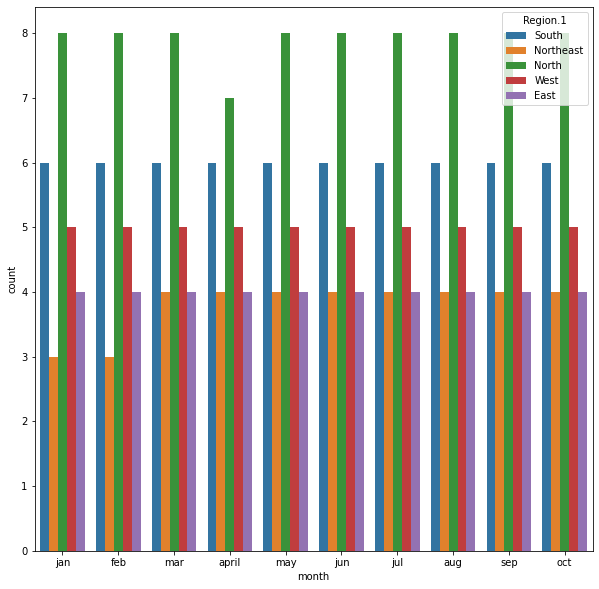

In [107]:
plt.figure(figsize=(10,10))
sns.countplot(df["month"],hue=df["Region.1"])

## Month wise and Region wise unemployment

In [108]:
df.groupby(["month","Region","Region.1"])[" Estimated Unemployment Rate (%)"].sum().sort_values(ascending=False)

month  Region      Region.1 
april  Puducherry  South        75.85
may    Jharkhand   East         59.23
       Puducherry  South        58.19
april  Tamil Nadu  South        49.83
       Jharkhand   East         47.09
                                ...  
jun    Meghalaya   Northeast     1.15
oct    Sikkim      Northeast     0.88
jun    Assam       Northeast     0.60
jan    Puducherry  South         0.58
aug    Karnataka   South         0.50
Name:  Estimated Unemployment Rate (%), Length: 267, dtype: float64

## April is the month and Puducherry south region  is the region we have high unemployment.

In [109]:
df.groupby(["month","Region","Region.1"])[" Estimated Unemployment Rate (%)"].sum().sort_values()

month  Region      Region.1 
aug    Karnataka   South         0.50
jan    Puducherry  South         0.58
jun    Assam       Northeast     0.60
oct    Sikkim      Northeast     0.88
jun    Meghalaya   Northeast     1.15
                                ...  
april  Jharkhand   East         47.09
       Tamil Nadu  South        49.83
may    Puducherry  South        58.19
       Jharkhand   East         59.23
april  Puducherry  South        75.85
Name:  Estimated Unemployment Rate (%), Length: 267, dtype: float64

In [110]:
df.head()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Region.1,longitude,latitude,month
0,Andhra Pradesh,2020-01-31,M,5.48,16635535,41.02,South,15.9129,79.7400,jan
227,Tripura,2020-01-31,M,32.67,1508130,69.69,Northeast,23.9408,91.9882,jan
40,Delhi,2020-01-31,M,22.23,5805284,47.79,North,28.7041,77.1025,jan
217,Telangana,2020-01-31,M,5.49,17609295,59.25,South,18.1124,79.0193,jan
207,Tamil Nadu,2020-01-31,M,1.57,26881641,41.96,South,11.1271,78.6569,jan


## August is the month and in Karnataka, South  is the region we have low unemployment

<AxesSubplot:xlabel='month,Region.1'>

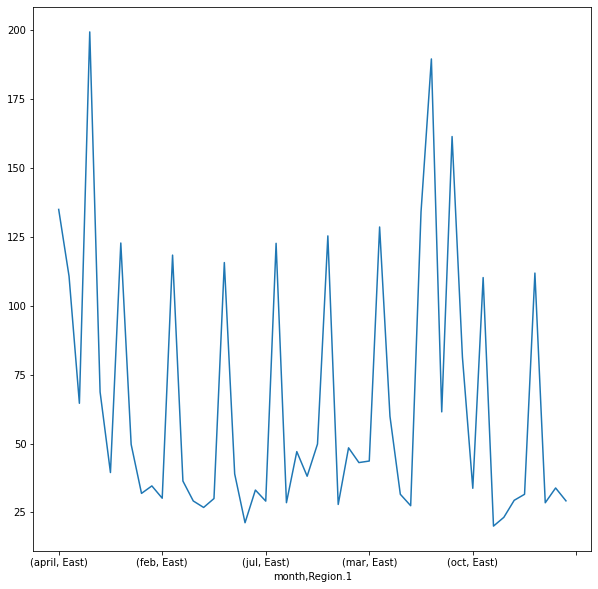

In [116]:
plt.figure(figsize=(10,10))
df.groupby(["month","Region.1"])[" Estimated Unemployment Rate (%)"].sum().plot()

<AxesSubplot:xlabel='month,Region'>

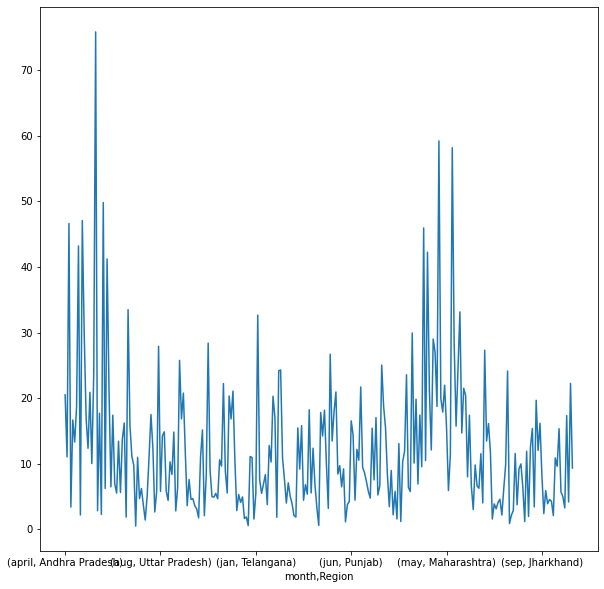

In [112]:
plt.figure(figsize=(10,10))
df.groupby(["month","Region"])[" Estimated Unemployment Rate (%)"].sum().plot()

<AxesSubplot:xlabel='month,Region,Region.1'>

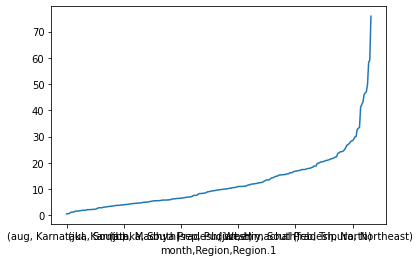

In [113]:
df.groupby(["month","Region","Region.1"])[" Estimated Unemployment Rate (%)"].sum().sort_values().plot()

## In this way  I have analised the unemployement during 2020 covid19 time and deliverd the insights  Month wise and Region wise  trends .